In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

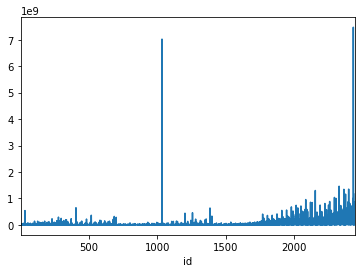

In [17]:
df = pd.read_csv("C:\\Users\\EdwinVivekN\\AppData\\Local\\Programs\\Python\\Python37-32\\myscripts\\data\\single.csv", index_col=[0], squeeze=True)
df.plot()

In [49]:
print(df.head())

#maxval = df.loc[df.idxmax()]
df.describe()

id
1      755858
2    51483437
3      825115
4     3722850
5     2327135
Name: value, dtype: int64


count    2.449000e+03
mean     5.859924e+07
std      2.494403e+08
min      0.000000e+00
25%      6.845700e+05
50%      5.851830e+06
75%      3.406395e+07
max      7.470011e+09
Name: value, dtype: float64

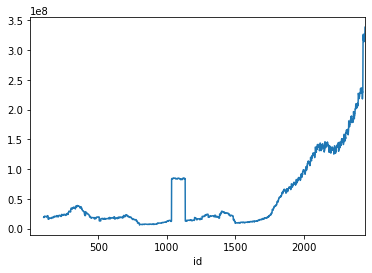

In [54]:
df.rolling(window=100).mean().plot()

In [65]:
model = SimpleExpSmoothing(df)
fit1 = model.fit()
pred1 = fit1.forecast(10).rename(r'$\alpha=%s$'%fit1.model.params['smoothing_level'])

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


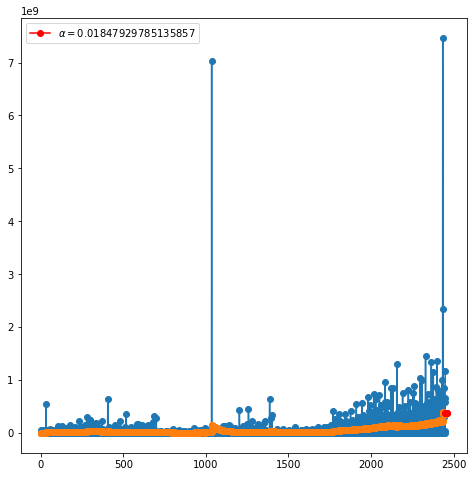

In [70]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(df.index, df, marker='o')
ax.plot(df.index, fit1.fittedvalues, marker ='o')
line1, = plt.plot(pred1, marker='o', color='red')
plt.legend([line1], [pred1.name]) 

In [58]:
(fit1.params['smoothing_level'])

0.01847929785135857

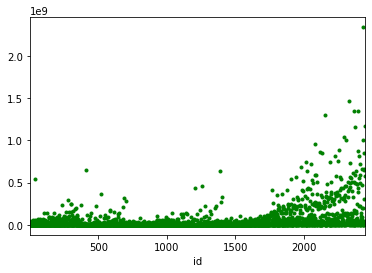

In [48]:
df1 = df.drop(df.idxmax())
df1.drop(df1.idxmax(), inplace=True)
df1.plot(style='g.')

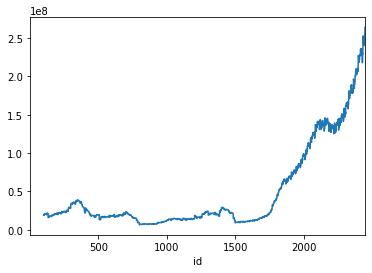

In [53]:
df1.rolling(window=100).mean().plot()

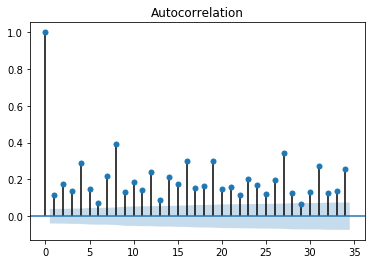

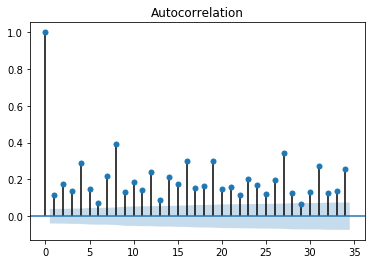

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1)

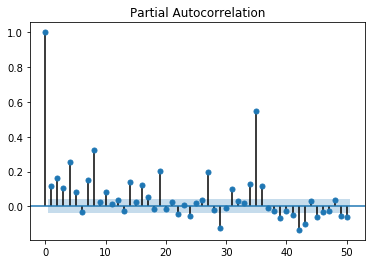

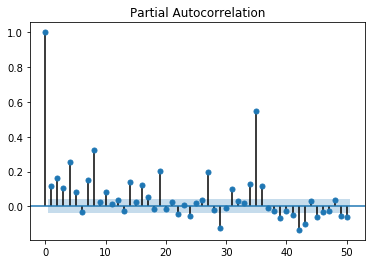

In [65]:
plot_pacf(df1, lags=50)